# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | mount pearl
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | cabedelo
Processing Record 6 of Set 1 | opuwo
Processing Record 7 of Set 1 | timimoun
Processing Record 8 of Set 1 | posse
Processing Record 9 of Set 1 | coahuayana de hidalgo
Processing Record 10 of Set 1 | hinton
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | remire-montjoly
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | taber
Processing Record 15 of Set 1 | mejit
Processing Record 16 of Set 1 | fale old settlement
Processing Record 17 of Set 1 | kenai
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | kabansk
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | novaya igirma
Processing Record 22 of Set 1 | capo d'orla

In [34]:
city_data

[{'City': 'isafjordur',
  'Lat': 66.0755,
  'Lng': -23.124,
  'Max Temp': 277.17,
  'Humidity': 81,
  'Cloudiness': 100,
  'Wind Speed': 8.75,
  'Country': 'IS',
  'Date': 1717851044},
 {'City': 'bilibino',
  'Lat': 68.0546,
  'Lng': 166.4372,
  'Max Temp': 276.82,
  'Humidity': 57,
  'Cloudiness': 3,
  'Wind Speed': 1.28,
  'Country': 'RU',
  'Date': 1717851045},
 {'City': 'mount pearl',
  'Lat': 47.5166,
  'Lng': -52.7813,
  'Max Temp': 285.35,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 4.63,
  'Country': 'CA',
  'Date': 1717850960},
 {'City': 'hermanus',
  'Lat': -34.4187,
  'Lng': 19.2345,
  'Max Temp': 291.37,
  'Humidity': 63,
  'Cloudiness': 100,
  'Wind Speed': 2.4,
  'Country': 'ZA',
  'Date': 1717851045},
 {'City': 'cabedelo',
  'Lat': -6.9811,
  'Lng': -34.8339,
  'Max Temp': 300.52,
  'Humidity': 80,
  'Cloudiness': 63,
  'Wind Speed': 5.55,
  'Country': 'BR',
  'Date': 1717851045},
 {'City': 'opuwo',
  'Lat': -18.0607,
  'Lng': 13.84,
  'Max Temp': 300.08,
  'H

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,277.17,81,100,8.75,IS,1717851044
1,bilibino,68.0546,166.4372,276.82,57,3,1.28,RU,1717851045
2,mount pearl,47.5166,-52.7813,285.35,96,100,4.63,CA,1717850960
3,hermanus,-34.4187,19.2345,291.37,63,100,2.40,ZA,1717851045
4,cabedelo,-6.9811,-34.8339,300.52,80,63,5.55,BR,1717851045


In [ ]:
# Change temperature from Kelvin to Celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv(".\output_data\cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv(".\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,4.02,81,100,8.75,IS,1717851044
1,bilibino,68.0546,166.4372,3.67,57,3,1.28,RU,1717851045
2,mount pearl,47.5166,-52.7813,12.20,96,100,4.63,CA,1717850960
3,hermanus,-34.4187,19.2345,18.22,63,100,2.40,ZA,1717851045
4,cabedelo,-6.9811,-34.8339,27.37,80,63,5.55,BR,1717851045


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

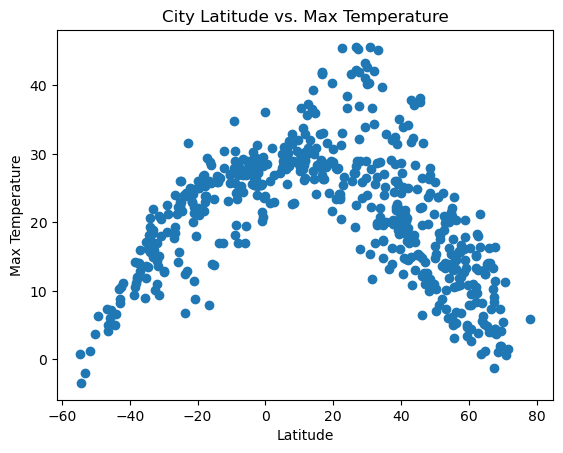

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

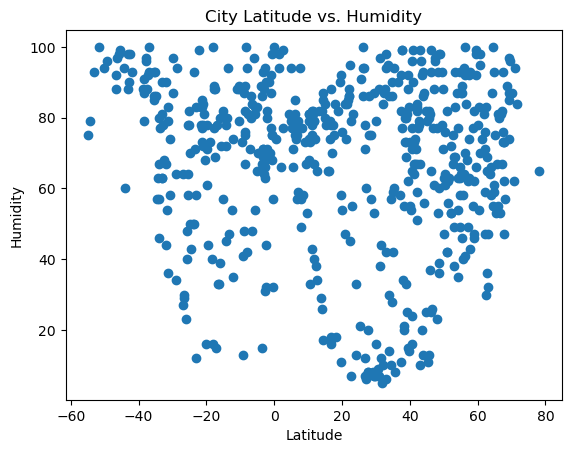

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

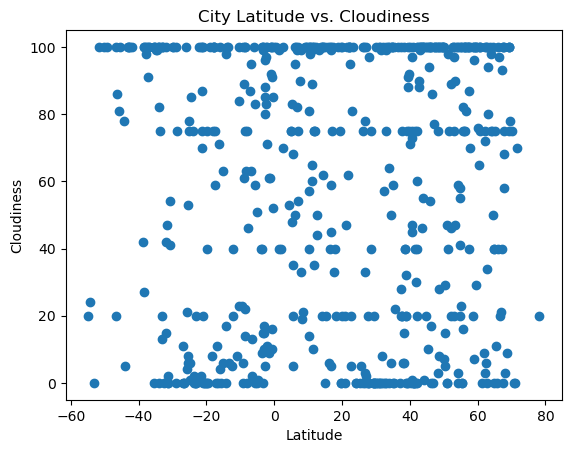

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

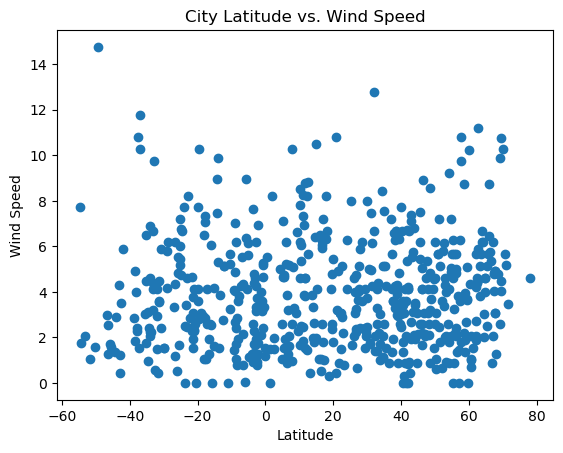

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linRegressPlot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regressionValues = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print("The r-value is", rvalue)
    plt.scatter(x,y)
    plt.plot(x,regressionValues,"r-")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,4.02,81,100,8.75,IS,1717851044
1,bilibino,68.0546,166.4372,3.67,57,3,1.28,RU,1717851045
2,mount pearl,47.5166,-52.7813,12.20,96,100,4.63,CA,1717850960
6,timimoun,29.2639,0.2310,43.21,8,0,1.54,DZ,1717851045
8,coahuayana de hidalgo,18.7000,-103.6583,24.31,82,100,0.29,MX,1717851045


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hermanus,-34.4187,19.2345,18.22,63,100,2.40,ZA,1717851045
4,cabedelo,-6.9811,-34.8339,27.37,80,63,5.55,BR,1717851045
5,opuwo,-18.0607,13.8400,26.93,16,100,6.48,NaN,1717851045
7,posse,-14.0931,-46.3694,25.90,45,17,5.30,BR,1717851045
10,ushuaia,-54.8000,-68.3000,0.81,75,20,7.72,AR,1717850756


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.73460220382909


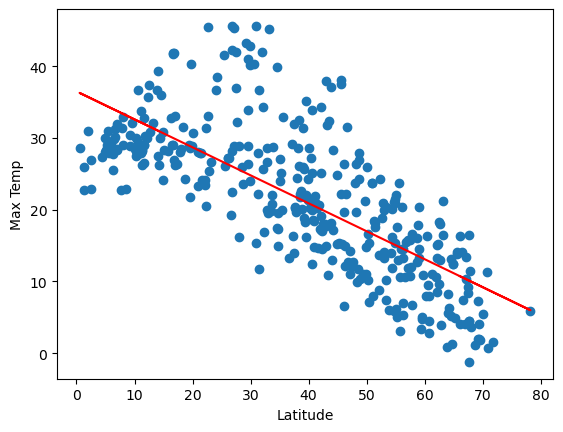

In [16]:
# Linear regression on Northern Hemisphere
linRegressPlot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is 0.8231955113340849


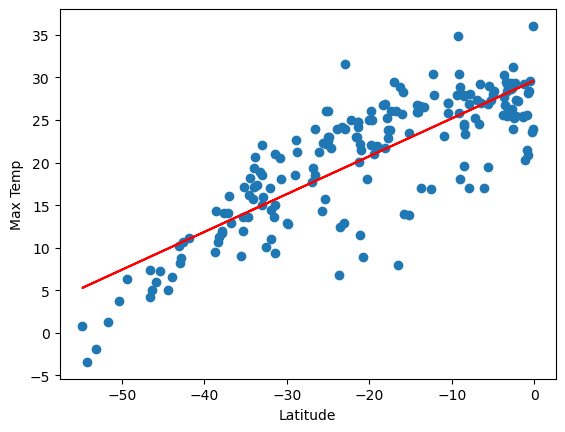

In [17]:
# Linear regression on Southern Hemisphere
linRegressPlot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** From these two graphs we can see that there is a strong relationship between latitude and the maximum temperature. This is further confirmed by the r-values.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.05418730915870061


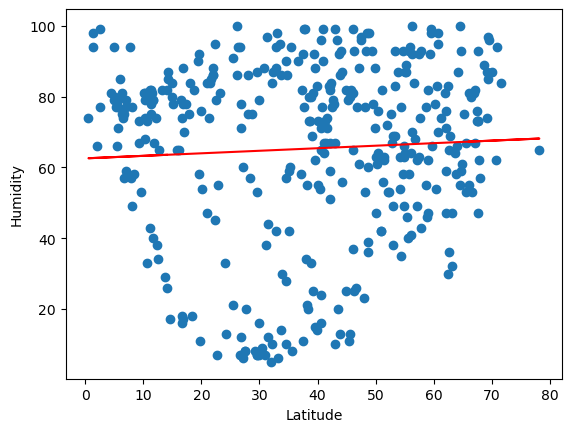

In [18]:
# Northern Hemisphere
linRegressPlot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is -0.1911038728728819


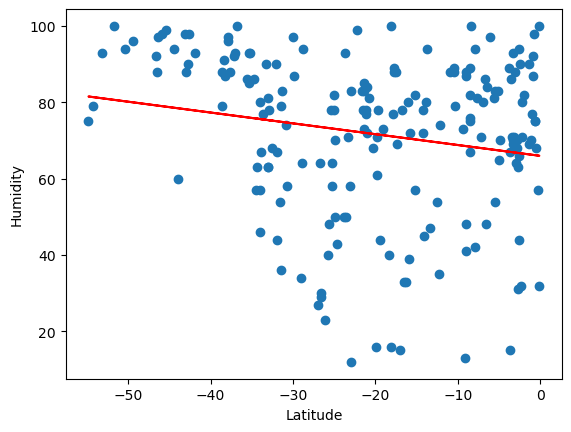

In [19]:
# Southern Hemisphere
linRegressPlot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Both of these plots have a very weak r-value which implies latitude and humidity don't really corrolate with each other.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.002959047658666538


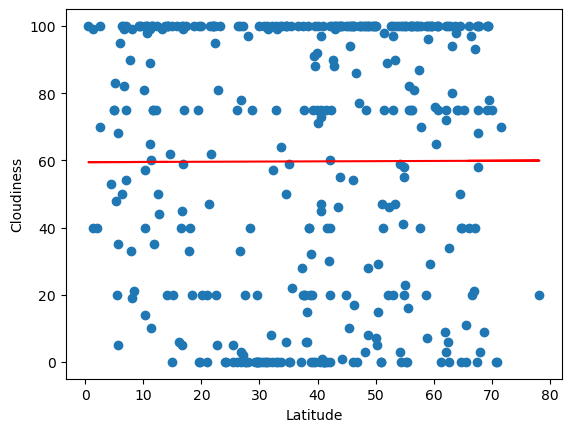

In [20]:
# Northern Hemisphere
linRegressPlot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is -0.10086188130543819


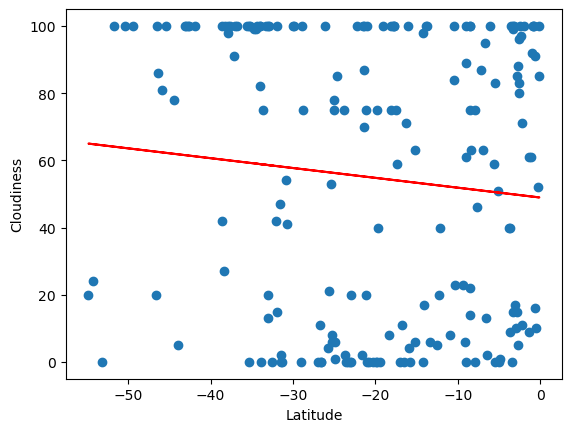

In [21]:
# Southern Hemisphere
linRegressPlot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Once again the r-value is extremely small, indicating no corrolation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.04392193406098387


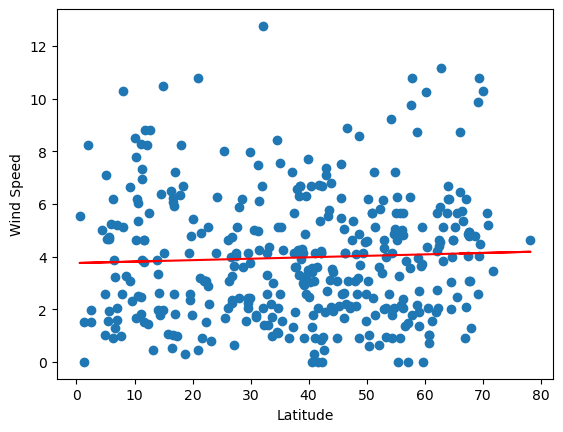

In [22]:
# Northern Hemisphere
linRegressPlot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is -0.06627273574774964


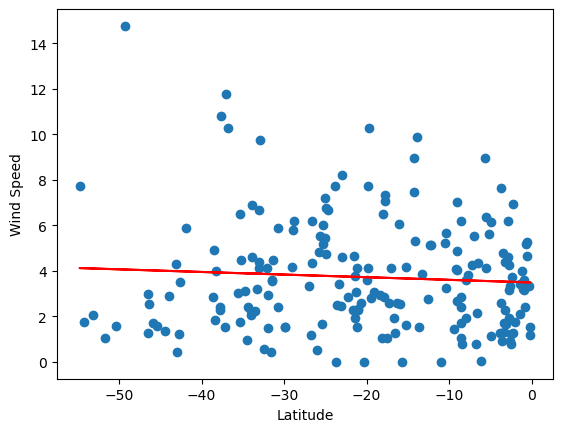

In [23]:
# Southern Hemisphere
linRegressPlot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** The r-values here are very weak as well, indicating no corrolation between latitude and wind speed.